# MovieLens Data Analysis
This notebook contains basic analyses and visualizations with the MovieLens dataset.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
movies = pd.read_csv('../data/movies.csv')
links = pd.read_csv('../data/links.csv')
# Sample ratings and tags files if they are too large
ratings = pd.read_csv('../data/ratings.csv', nrows=100000)
tags = pd.read_csv('../data/tags.csv', nrows=100000)

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# (Removed) Create images directory in the parent folder if it doesn't exist

## Most Popular Genres

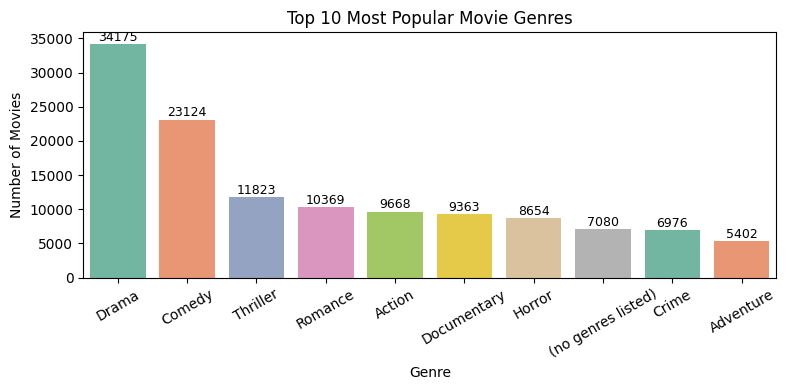

In [ ]:
from collections import Counter
genre_list = movies['genres'].str.split('|').explode()
genre_counts = Counter(genre_list)
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=list(genres), y=list(counts), hue=list(genres), palette='Set2', legend=False)
plt.title('Top 10 Most Popular Movie Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.xticks(rotation=30)
for i, v in enumerate(counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

## Rating Distribution

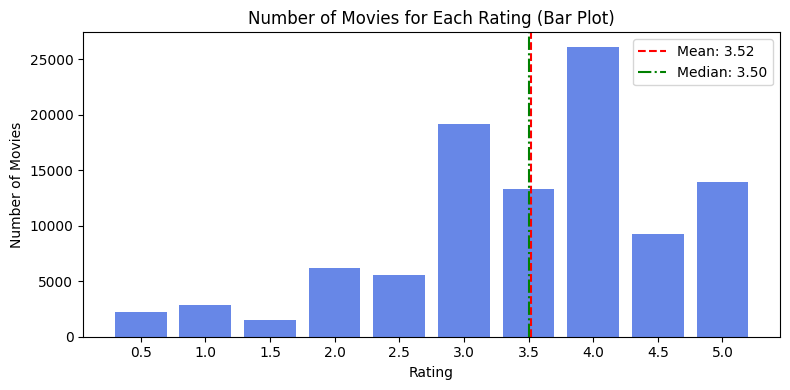

In [ ]:
rating_counts = ratings['rating'].value_counts().sort_index()
plt.figure(figsize=(8,4))
ax = plt.bar(rating_counts.index, rating_counts.values, color='royalblue', alpha=0.8, width=0.4)
mean = ratings['rating'].mean()
median = ratings['rating'].median()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')
plt.title('Number of Movies for Each Rating (Bar Plot)')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rating_counts.index)
plt.legend()
plt.tight_layout()
plt.show()

## Most Rated Movies

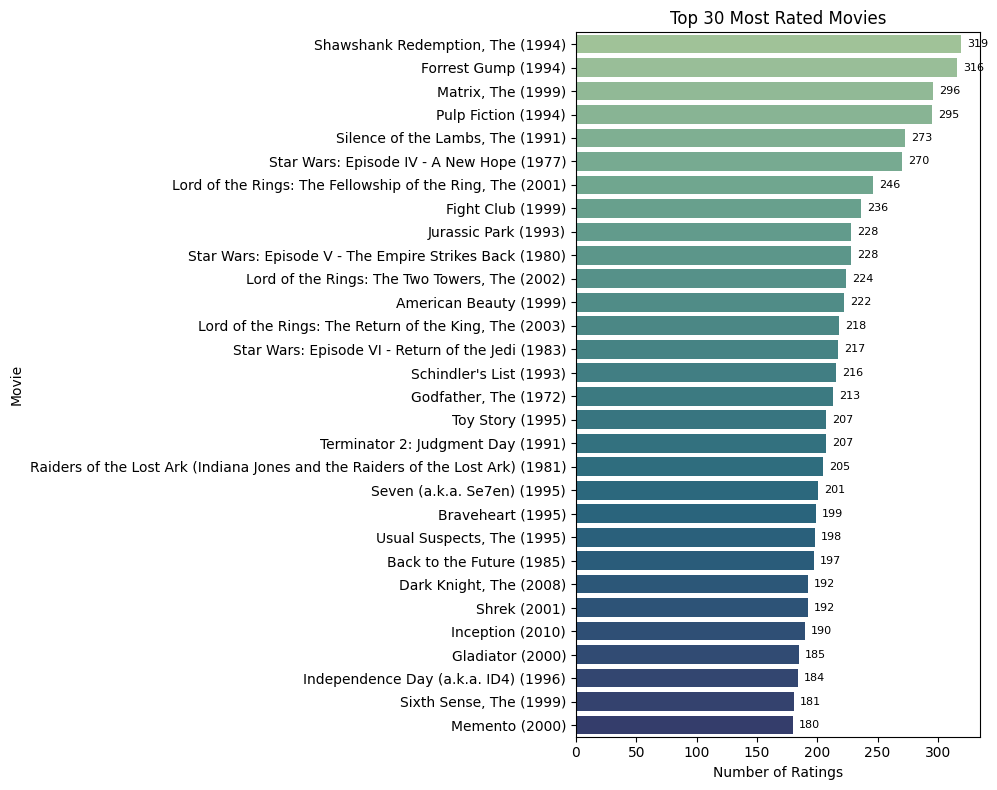

In [ ]:
top_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(30)
top_movies = top_movies.reset_index().merge(movies[['movieId','title']], on='movieId')
plt.figure(figsize=(10,8))
ax = sns.barplot(y='title', x=0, data=top_movies, hue='title', palette='crest', legend=False)
plt.title('Top 30 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie')
plt.tight_layout()
for i, v in enumerate(top_movies[0]):
    ax.text(v + 5, i, str(v), va='center', fontsize=8)
plt.show()

## Basic Statistics
Basic statistics such as mean, median, standard deviation, and variance of the ratings.

In [70]:
mean = ratings['rating'].mean()
median = ratings['rating'].median()
std = ratings['rating'].std()
var = ratings['rating'].var()
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Variance: {var:.2f}")

# Interpretation
if mean > median:
    print("The mean is higher than the median, indicating a slight right skew in the ratings.")
elif mean < median:
    print("The mean is lower than the median, indicating a slight left skew in the ratings.")
else:
    print("The mean and median are equal, indicating a symmetric distribution.")

print(f"A standard deviation of {std:.2f} shows that most ratings are within ±{std:.2f} of the mean.")

Mean: 3.52
Median: 3.50
Standard Deviation: 1.07
Variance: 1.15
The mean is higher than the median, indicating a slight right skew in the ratings.
A standard deviation of 1.07 shows that most ratings are within ±1.07 of the mean.


## Correlation Analysis
Examining the relationship between movie genres and average ratings.

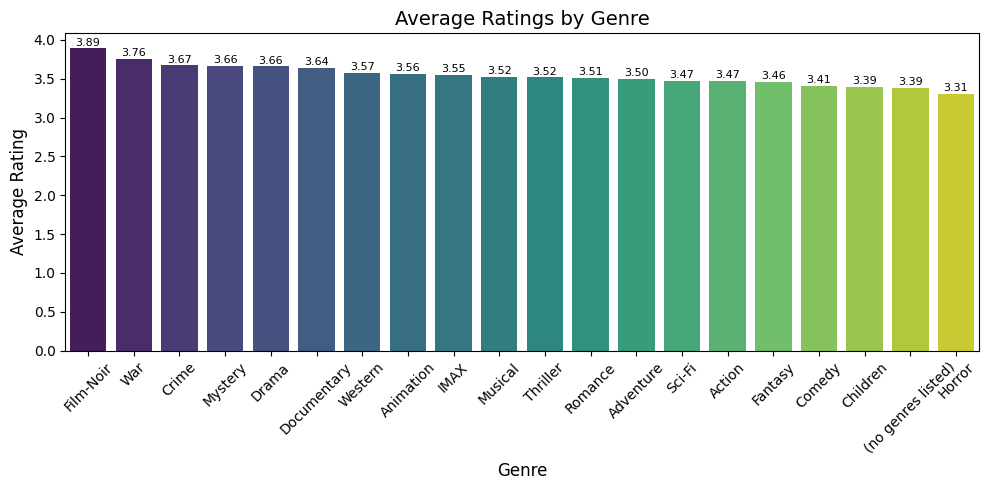

Genres with higher average ratings may indicate niche or critically acclaimed genres, while lower averages may reflect broader, more divisive genres.


In [ ]:
# Average rating for each genre (avoid SettingWithCopyWarning)
genre_scores = {}
genres_unique = set([g for sublist in movies['genres'].str.split('|') for g in sublist])
for genre in genres_unique:
    mask = movies['genres'].str.contains(genre, regex=False)
    movie_ids = movies[mask]['movieId']
    genre_ratings = ratings[ratings['movieId'].isin(movie_ids)]['rating']
    genre_scores[genre] = genre_ratings.mean()

sorted_genres = sorted(genre_scores.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_means = zip(*sorted_genres)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=list(genre_names), y=list(genre_means), hue=list(genre_names), palette='viridis', legend=False)
plt.title('Average Ratings by Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(genre_means):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

# Interpretation
print("Genres with higher average ratings may indicate niche or critically acclaimed genres, while lower averages may reflect broader, more divisive genres.")

## Time Series Analysis
Examining the change in average ratings over the years.

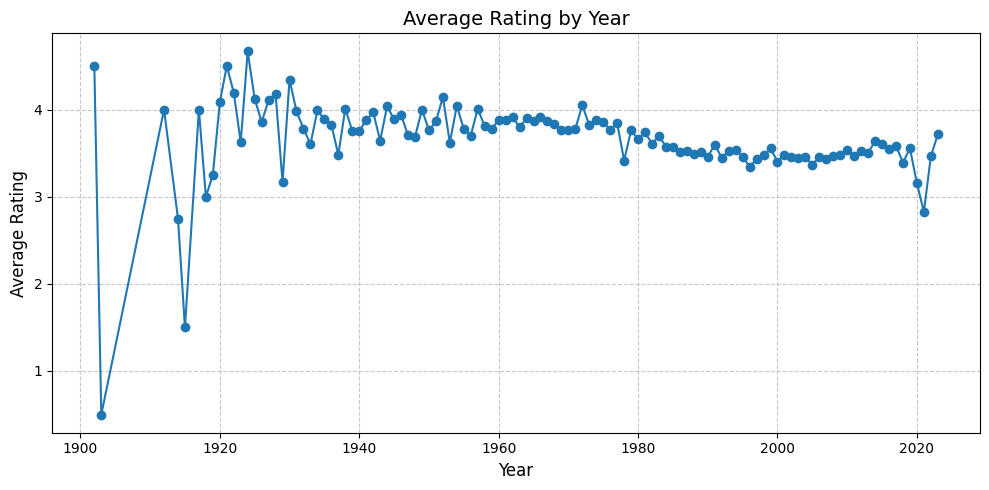

This plot shows how the average rating changes by movie release year. Trends may reflect changes in audience preferences or rating behavior over time.


In [ ]:
import re
# Extract year from title (robust extraction)
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return int(match.group(1)) if match else None
movies['year'] = movies['title'].apply(extract_year)
ratings_with_year = ratings.merge(movies[['movieId', 'year']], on='movieId')
yearly_avg = ratings_with_year.groupby('year')['rating'].mean().dropna()
plt.figure(figsize=(10,5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Rating by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretation
print("This plot shows how the average rating changes by movie release year. Trends may reflect changes in audience preferences or rating behavior over time.")

## User Behavior
Analysis of the most active users and average rating per user.

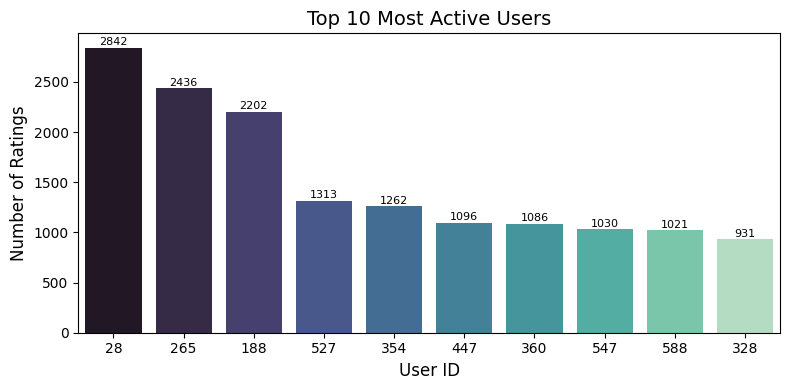

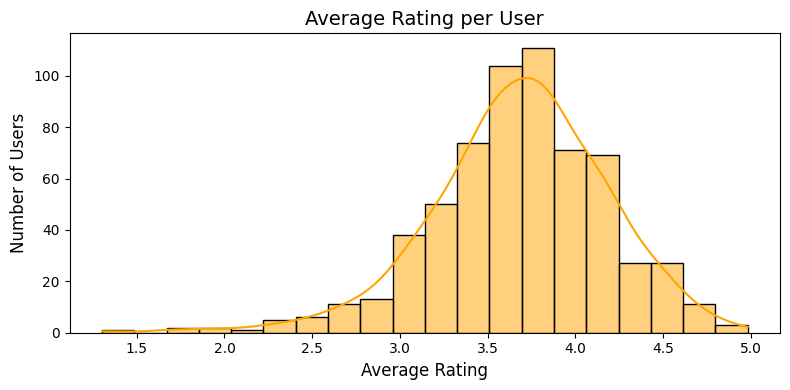

Most users rate only a few movies, while a small group is highly active. The average rating per user shows if some users are more critical or generous than others.


In [ ]:
user_counts = ratings['userId'].value_counts().head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=user_counts.index.astype(str), y=user_counts.values, hue=user_counts.index.astype(str), palette='mako', legend=False)
plt.title('Top 10 Most Active Users', fontsize=14)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
for i, v in enumerate(user_counts.values):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

user_avg = ratings.groupby('userId')['rating'].mean()
plt.figure(figsize=(8,4))
sns.histplot(user_avg, bins=20, kde=True, color='orange')
plt.title('Average Rating per User', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()
plt.show()

# Interpretation
print("Most users rate only a few movies, while a small group is highly active. The average rating per user shows if some users are more critical or generous than others.")

## Movies by Average Rating
List of the highest and lowest rated movies.

In [74]:
movie_avg = ratings.groupby('movieId')['rating'].mean().reset_index()
movie_avg = movie_avg.merge(movies[['movieId','title']], on='movieId')
# Top 10 highest rated movies (with at least 50 ratings)
movie_counts = ratings['movieId'].value_counts()
movie_avg['count'] = movie_avg['movieId'].map(movie_counts)
top_rated = movie_avg[movie_avg['count']>=50].sort_values('rating', ascending=False).head(10)
low_rated = movie_avg[movie_avg['count']>=50].sort_values('rating').head(10)
print('Top rated movies:')
print(top_rated[['title','rating','count']])
print('Lowest rated movies:')
print(low_rated[['title','rating','count']])

Top rated movies:
                                                  title    rating  count
269                    Shawshank Redemption, The (1994)  4.385580    319
444                             Schindler's List (1993)  4.291667    216
636                               Godfather, The (1972)  4.291080    213
7751                                    Whiplash (2014)  4.271186     59
2148                                  Fight Club (1999)  4.239407    236
660                                  Rear Window (1954)  4.225000     80
3822  Spirited Away (Sen to Chihiro no kamikakushi) ...  4.223529     85
583   Dr. Strangelove or: How I Learned to Stop Worr...  4.212963    108
98                                   Taxi Driver (1976)  4.211111     90
832         Wallace & Gromit: The Wrong Trousers (1993)  4.210000     50
Lowest rated movies:
                                      title    rating  count
3282              Planet of the Apes (2001)  2.601852     54
601                   Cable Guy, The

## User-Movie Matrix Heatmap
A heatmap visualization of a small sample of user ratings for movies.

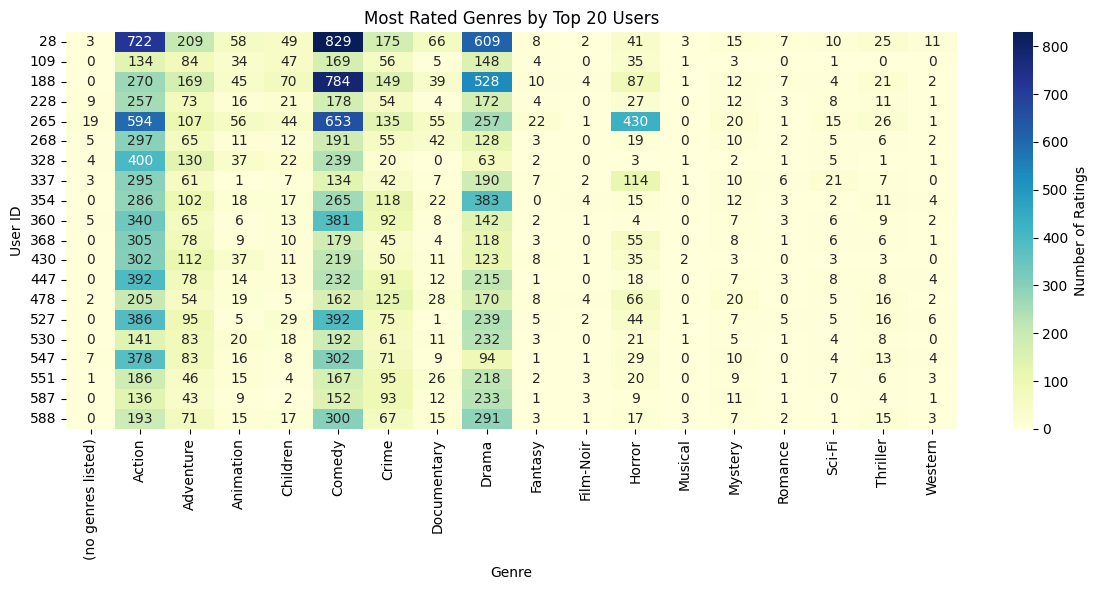

This heatmap shows which genres are most frequently rated by the most active users. It helps to identify user preferences and genre popularity among top users.


In [ ]:
# Most common genre per user (first 20 users)
user_genres = ratings.merge(movies[['movieId', 'genres']], on='movieId')
user_genres['main_genre'] = user_genres['genres'].str.split('|').str[0]
top_users = user_genres['userId'].value_counts().head(20).index
pivot = user_genres[user_genres['userId'].isin(top_users)].pivot_table(index='userId', columns='main_genre', values='rating', aggfunc='count', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Ratings'})
plt.title('Most Rated Genres by Top 20 Users')
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()

# Interpretation
print("This heatmap shows which genres are most frequently rated by the most active users. It helps to identify user preferences and genre popularity among top users.")